In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fe53b184f367847aa55a2617e1b05248cac098b2c3dd14dae217169b3ce2e42b10bcc2af6d9b6787a4792a557f9705bb1eba86d761f2407d2'

In [2]:
import aocd
from aocd.models import Puzzle
day = 23
year = 2022
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
test_data = """....#..
..###.#
#...#.#
.#...##
#.###..
##.#.##
.#..#.."""

In [86]:
test_data2 = """.....
..##.
..#..
.....
..##.
....."""

In [135]:
data = puzzle.input_data.splitlines()
data_test = test_data.splitlines()
len(data), data[:10]

(70,
 ['###..#####..#....##.#..#...#.#.#..#.##..##...#.#.###.#.###...###.#....',
  '#..#..#.#....#.#.####.#.#.....#..####...####.##.#.#....####...#..#.#..',
  '...##...#.#####..###......#.#.#..##.#..#..#####.#..###.#.####.#.####..',
  '#.#...#...#.#..##.#.#..#.####...#.#####.###.##....##.###.#.##..####.#.',
  '...##.##..#.##.###..##.####.##.#...##...#.#...#.##.#..##...###.###....',
  '.......#.#..#.#....#....#.....##...#.#...###..#..#.##...#....##...#..#',
  '#.##..#.#..#.#####.#.#....##..#..##..###...#.###.####.#.....#..#.#.##.',
  '.#####.......###.##.#....#...##.#.#...#.######...##.#.#.###...###..#..',
  '.#.###..#####.##.##...#..##..#.#..#.####.##..###.##..##..##..##..##.#.',
  '..##..###.###.....#...###.#.#...#####.##..######.#.#.#...#..####....#.'])

In [194]:
def vis(elves, shape=None):
    points = np.array([(int(elf.real), int(elf.imag)) for elf in elves])
    if shape is None:
        shape = points.max(axis=0) - points.min(axis=0) + 2
    minx, miny = points.min(axis=0)
    grove = np.zeros(shape)
    # print(grove.shape)
    for point in points:
        x, y = point
        x -= minx
        y -= miny
        grove[y, x] = 1
    return np.flipud(grove)

def parse(lines):
    tot = 0
    lines = lines.copy()
    lines.reverse()
    elves = set()
    for y, line in enumerate(lines):
        for x, c in enumerate(line):
            if c=='#':
                elves.add(x + y*1j)
                tot+=1
                
    return elves

def nbrs(pos):
    for dx in (-1, 0, +1):
        for dy in (-1, 0, +1):
            if (dx == 0) and (dy == 0):
                continue
            yield pos + dx + dy*1j

def step(elves, ick=0):
    nproposed = defaultdict(int)
    proposed = dict()
    checks = [(1j, -1 + 1j, 1+1j), (-1j, -1 + -1j, 1-1j), (-1, -1 + 1j, -1-1j), (1, 1 + 1j, 1-1j)]
    nck = len(checks)
   
    # first phase
    for elf in elves:
        num_nbrs = sum([(nbr in elves) for nbr in nbrs(elf)])
        if num_nbrs == 0:
            continue
        for j in range(4):
            i = (ick + j) % nck
            if sum([(elf + d) in elves for d in checks[i]]) == 0:
                new_pos = elf + checks[i][0]
                proposed[elf] = new_pos
                nproposed[new_pos] += 1
                break
    # second phase
    new_elves = set()
    moved = 0
    for elf in elves:
        if elf in proposed and nproposed[proposed[elf]] == 1:
            new_elves.add(proposed[elf])
            if abs(elf - proposed[elf]) > 2:
                print(elf, proposed[elf])
            moved += 1
        else:
            new_elves.add(elf)
    return new_elves, moved


22


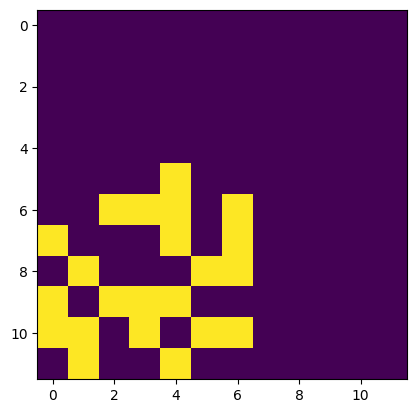

In [195]:
elves = parse(data_test)
print(len(elves))
plt.imshow(vis(elves, shape=(12, 12)))

In [196]:
%%time
elves = parse(data)
for i in range(10):
    # print(i)
    elves, _ = step(elves, ick=i)
    # print(len(elves))
    # plt.figure()
    # plt.imshow(vis(elves, shape=(12, 12)))

CPU times: user 157 ms, sys: 8.07 ms, total: 165 ms
Wall time: 160 ms


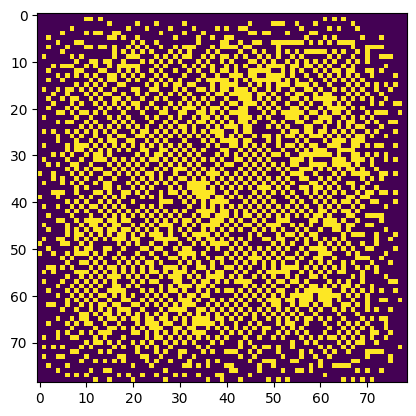

In [197]:
grove = vis(elves)
plt.imshow(grove)

In [198]:
y, x = grove.shape
res = (y-1) * (x-1) - len(elves)
res

3689

In [193]:
puzzle.answer_a = res

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


# Part 2

In [214]:
%%time
elves = parse(data)
i = 0
while True:
    elves, moved = step(elves, ick=i)
    i += 1
    if moved == 0:
        # i += 1
        break
    # print(len(elves))
    # plt.figure()
    # plt.imshow(vis(elves, shape=(12, 12)))
    
print(i)

965
CPU times: user 9.9 s, sys: 11.1 ms, total: 9.91 s
Wall time: 9.92 s


In [215]:
puzzle.answer_b = i

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 23! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


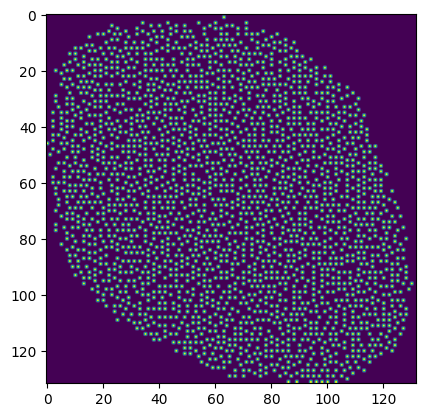

In [216]:
plt.imshow(vis(elves))